### 사전 준비

In [2]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as super

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

#### 패션 MNIST 데이터

데이터 로드

In [4]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [5]:
(train_input, train_target), (test_input, test_target) = load_data()

##### 정규화

In [6]:
train_scaled = train_input / 255.0 # 0~1사이 실수값으로 변경

In [7]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [8]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


##### 모델생성 함수

In [9]:
def model_fn(a_layer=None):
    model = keras.Sequential(name="model_fn_MakeModel")
    model.add(keras.layers.Flatten(input_shape=(28,28))) # 2차원 입력값을 1차원으로 변경
    model.add(keras.layers.Dense(100, activation="relu", name="hidden"))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation="softmax", name="output"))

    return model

In [10]:
# 함수 사용 예
model = model_fn(keras.layers.Dense(100, activation="relu", name="hidden2"))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


#### 손실곡선, 정확도

In [11]:
model = model_fn()
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)

Epoch 1/5
1500/1500 - 3s - loss: 0.5287 - accuracy: 0.8126 - 3s/epoch - 2ms/step
Epoch 2/5
1500/1500 - 2s - loss: 0.3924 - accuracy: 0.8592 - 2s/epoch - 2ms/step
Epoch 3/5
1500/1500 - 2s - loss: 0.3557 - accuracy: 0.8711 - 2s/epoch - 1ms/step
Epoch 4/5
1500/1500 - 2s - loss: 0.3351 - accuracy: 0.8788 - 2s/epoch - 2ms/step
Epoch 5/5
1500/1500 - 3s - loss: 0.3215 - accuracy: 0.8865 - 3s/epoch - 2ms/step


In [13]:
history.history

{'loss': [0.5286791920661926,
  0.39236459136009216,
  0.3556971848011017,
  0.3350791931152344,
  0.32149848341941833],
 'accuracy': [0.8126041889190674,
  0.8592291474342346,
  0.8710625171661377,
  0.8787916898727417,
  0.8865416646003723]}

#### 손실곡선 차트

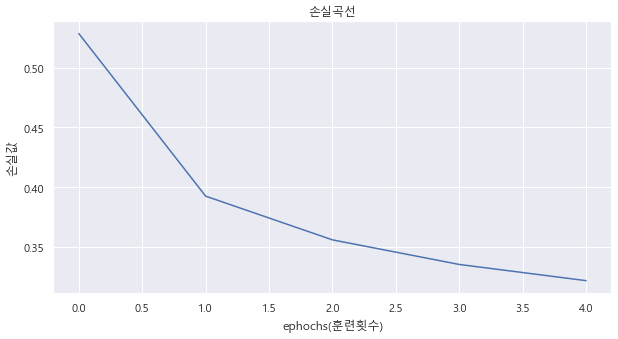

In [14]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"])
plt.title("손실곡선")
plt.xlabel("ephochs(훈련횟수)")
plt.ylabel("손실값")
plt.show()

#### 정확도 차트

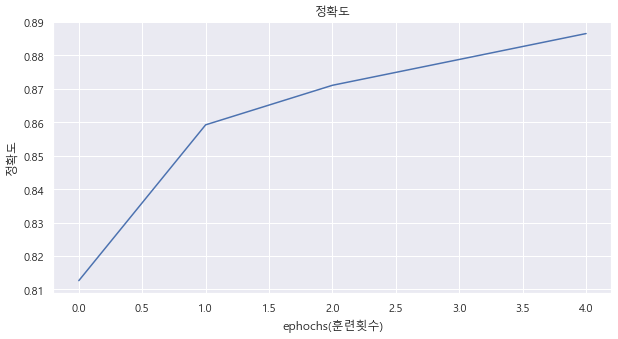

In [15]:
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"])
plt.title("정확도")
plt.xlabel("ephochs(훈련횟수)")
plt.ylabel("정확도")
plt.show()

#### 에포크 20번 훈련

In [16]:
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5348 - accuracy: 0.8100
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3975 - accuracy: 0.8566
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3595 - accuracy: 0.8705
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3383 - accuracy: 0.8778
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3209 - accuracy: 0.8842
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3121 - accuracy: 0.8902
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3017 - accuracy: 0.8924
Epoch 8/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2912 - accuracy: 0.8972
Epoch 9/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2857 - accuracy: 0.9001
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.276

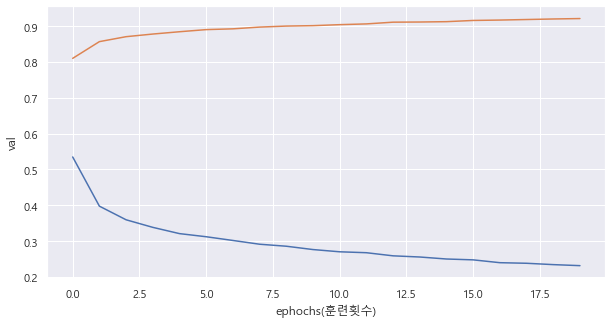

In [17]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
#plt.title("정확도")
plt.xlabel("ephochs(훈련횟수)")
plt.ylabel("val")
plt.show()

#### 검증손실

훈련세트 훈련 -> 정확도 92%

In [18]:
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5312 - accuracy: 0.8137 - val_loss: 0.4130 - val_accuracy: 0.8560
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3931 - accuracy: 0.8595 - val_loss: 0.4059 - val_accuracy: 0.8614
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3571 - accuracy: 0.8725 - val_loss: 0.3726 - val_accuracy: 0.8716
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3366 - accuracy: 0.8799 - val_loss: 0.3467 - val_accuracy: 0.8810
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3222 - accuracy: 0.8855 - val_loss: 0.3655 - val_accuracy: 0.8747
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3109 - accuracy: 0.8909 - val_loss: 0.3891 - val_accuracy: 0.8702
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3015 - accuracy: 0.8946 - val_loss: 0.3772 - val_accuracy:

훈련세트에서는 92%의 정확도였지만, 검증에서 0.88까지 정확도가 떨어짐
⇒ 과대적합

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

훈련세트 / 검증세트 비교

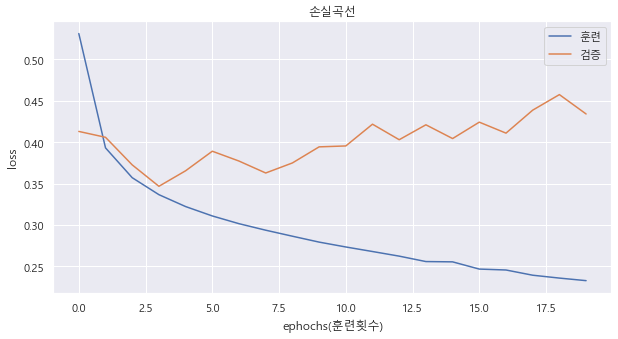

In [20]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("손실곡선")
plt.xlabel("ephochs(훈련횟수)")
plt.ylabel("loss")
plt.legend(["훈련","검증"])
plt.show()

#### 드롭아웃

In [21]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5815 - accuracy: 0.7960 - val_loss: 0.4379 - val_accuracy: 0.8447
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4470 - accuracy: 0.8419 - val_loss: 0.3824 - val_accuracy: 0.8642
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4192 - accuracy: 0.8534 - val_loss: 0.3890 - val_accuracy: 0.8682
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4051 - accuracy: 0.8593 - val_loss: 0.3825 - val_accuracy: 0.8664
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3981 - accuracy: 0.8636 - val_loss: 0.3865 - val_accuracy: 0.8670
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3960 - accuracy: 0.8655 - val_loss: 0.3813 - val_accuracy: 0.8688
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3884 - accuracy: 0.8692 - val_loss: 0.3807 - val_accuracy:

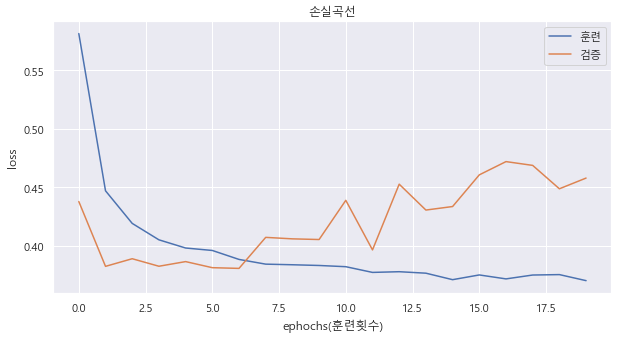

In [23]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("손실곡선")
plt.xlabel("ephochs(훈련횟수)")
plt.ylabel("loss")
plt.legend(["훈련","검증"])
plt.show()

In [24]:
# 옵티마이저(adam) 추가 후
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy", optimizer="adam")
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3573 - accuracy: 0.8758 - val_loss: 0.4074 - val_accuracy: 0.8765
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3472 - accuracy: 0.8762 - val_loss: 0.3922 - val_accuracy: 0.8700
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3319 - accuracy: 0.8798 - val_loss: 0.3876 - val_accuracy: 0.8758
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3285 - accuracy: 0.8802 - val_loss: 0.3814 - val_accuracy: 0.8797
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3141 - accuracy: 0.8851 - val_loss: 0.3835 - val_accuracy: 0.8767
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3078 - accuracy: 0.8867 - val_loss: 0.3821 - val_accuracy: 0.8786
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3008 - accuracy: 0.8897 - val_loss: 0.3853 - val_accuracy:

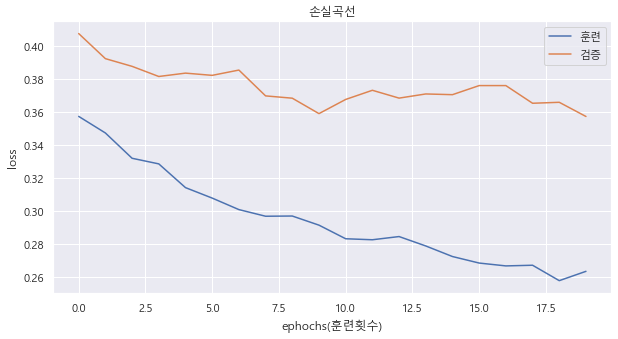

In [25]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("손실곡선")
plt.xlabel("ephochs(훈련횟수)")
plt.ylabel("loss")
plt.legend(["훈련","검증"])
plt.show()

#### 모델 저장/로드

In [26]:
# 훈련된 가중치만 저장
model.save_weights("./data/model-weights.h5")

In [27]:
# 훈련된 전체 데이터 저장
model.save("./data/model.h5")

##### 가중치 모델 로드

In [28]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights("./data/model-weights.h5")

##### 전체 모델 로드

In [29]:
model = keras.models.load_model("./data/model.h5")
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3572 - accuracy: 0.8861


[0.3572167158126831, 0.8860833048820496]

가중치만 저장하면 모델 기능 제약이 있다.\
모델 전체 데이터를 저장하면 모든 기능 수행 가능

In [30]:
model.predict(val_scaled)

375/375 [==============================] - 1s 2ms/step


array([[2.4865078e-26, 0.0000000e+00, 1.4578634e-38, ..., 2.7818071e-17,
        1.0000000e+00, 3.3539985e-27],
       [7.2423702e-14, 7.0322846e-38, 4.1326994e-21, ..., 2.2710034e-21,
        1.0000000e+00, 3.6365398e-19],
       [5.9059027e-27, 6.5658443e-30, 0.0000000e+00, ..., 9.9999940e-01,
        3.8433256e-18, 1.8228170e-15],
       ...,
       [1.7351169e-08, 8.3766950e-31, 2.5946945e-14, ..., 5.7465955e-15,
        1.0000000e+00, 1.9485947e-19],
       [9.4276930e-13, 0.0000000e+00, 1.8401831e-19, ..., 3.6074035e-25,
        1.0000000e+00, 9.4145456e-23],
       [2.6666403e-02, 2.3360545e-12, 9.7089470e-10, ..., 2.6203303e-02,
        4.8860873e-08, 9.4579971e-01]], dtype=float32)

In [31]:
### 예측결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 0s 1ms/step


0.8860833333333333

In [32]:
val_labels

array([8, 8, 7, ..., 8, 8, 9], dtype=int64)

#### 콜백(CallBack)

In [33]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy", optimizer="adam")

#베스트 모델을 저장할 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint("./data/best_model.h5")
model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5985 - accuracy: 0.7900 - val_loss: 0.4388 - val_accuracy: 0.8413
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4422 - accuracy: 0.8409 - val_loss: 0.3939 - val_accuracy: 0.8520
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4053 - accuracy: 0.8530 - val_loss: 0.3677 - val_accuracy: 0.8688
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3834 - accuracy: 0.8612 - val_loss: 0.3526 - val_accuracy: 0.8706
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3663 - accuracy: 0.8672 - val_loss: 0.3524 - val_accuracy: 0.8712
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3548 - accuracy: 0.8704 - val_loss: 0.3531 - val_accuracy: 0.8703
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3485 - accuracy: 0.8715 - val_loss: 0.3528 - val_accuracy:

In [34]:
# 체크포인트 확인
model = keras.models.load_model("./data/best_model.h5")
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3234 - accuracy: 0.8830


[0.3233874440193176, 0.8830000162124634]

#### 조기종료

In [61]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy", optimizer="adam")

#베스트 모델을 저장할 콜백
#save_best_only=True 옵션이 지정돼야 가장 좋은 모델이 저장됨
checkpoint_cb = keras.callbacks.ModelCheckpoint("./data/best_model.h5",save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1480/1500 [============================>.] - ETA: 0s - loss: 0.5913 - accuracy: 0.7921
Epoch 1: val_loss improved from inf to 0.42675, saving model to ./data\best_model.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5899 - accuracy: 0.7925 - val_loss: 0.4268 - val_accuracy: 0.8487
Epoch 2/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.4377 - accuracy: 0.8431
Epoch 2: val_loss improved from 0.42675 to 0.39083, saving model to ./data\best_model.h5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4377 - accuracy: 0.8431 - val_loss: 0.3908 - val_accuracy: 0.8578
Epoch 3/20
1475/1500 [============================>.] - ETA: 0s - loss: 0.3992 - accuracy: 0.8551
Epoch 3: val_loss improved from 0.39083 to 0.37236, saving model to ./data\best_model.h5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3983 - accuracy: 0.8554 - val_loss: 0.3724 - val_accuracy: 0.8618
Epoch 4/20
1498/1500 [======================

In [62]:
model.save("./data/best_model2")

INFO:tensorflow:Assets written to: ./data/best_model2\assets


In [63]:
# 어느 포크에서 조기종료했는지 확인
early_stopping_cb.stopped_epoch # N번째에서 멈춤(드랍아웃)

9

In [64]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8800


[0.32738810777664185, 0.8799999952316284]

#### 조기종료된 모델 저장값 / 체크포인트로 저장된 모델 저장값 비교

In [65]:
model_cp = keras.models.load_model("./data/best_model2")
model_cp.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3274 - accuracy: 0.8800


[0.32738810777664185, 0.8799999952316284]

In [71]:
### 예측결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)
print(val_labels[:10])

375/375 [==============================] - 0s 1ms/step
[8 8 7 4 8 4 1 0 4 5]
